In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("winedataset.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.shape

(1599, 12)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
duplicates = data.duplicated()
if duplicates.any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("No duplicate rows found.")


There are duplicate rows in the DataFrame.


In [7]:
duplicated_count = data.duplicated().sum()
print("The Duplicated values: ", duplicated_count)

The Duplicated values:  240


In [8]:
duplicated_rows = data[data.duplicated()]
print("Duplicate rows:")
print(duplicated_rows)


Duplicate rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free 

In [9]:
data = data.drop_duplicates()

In [10]:
# data

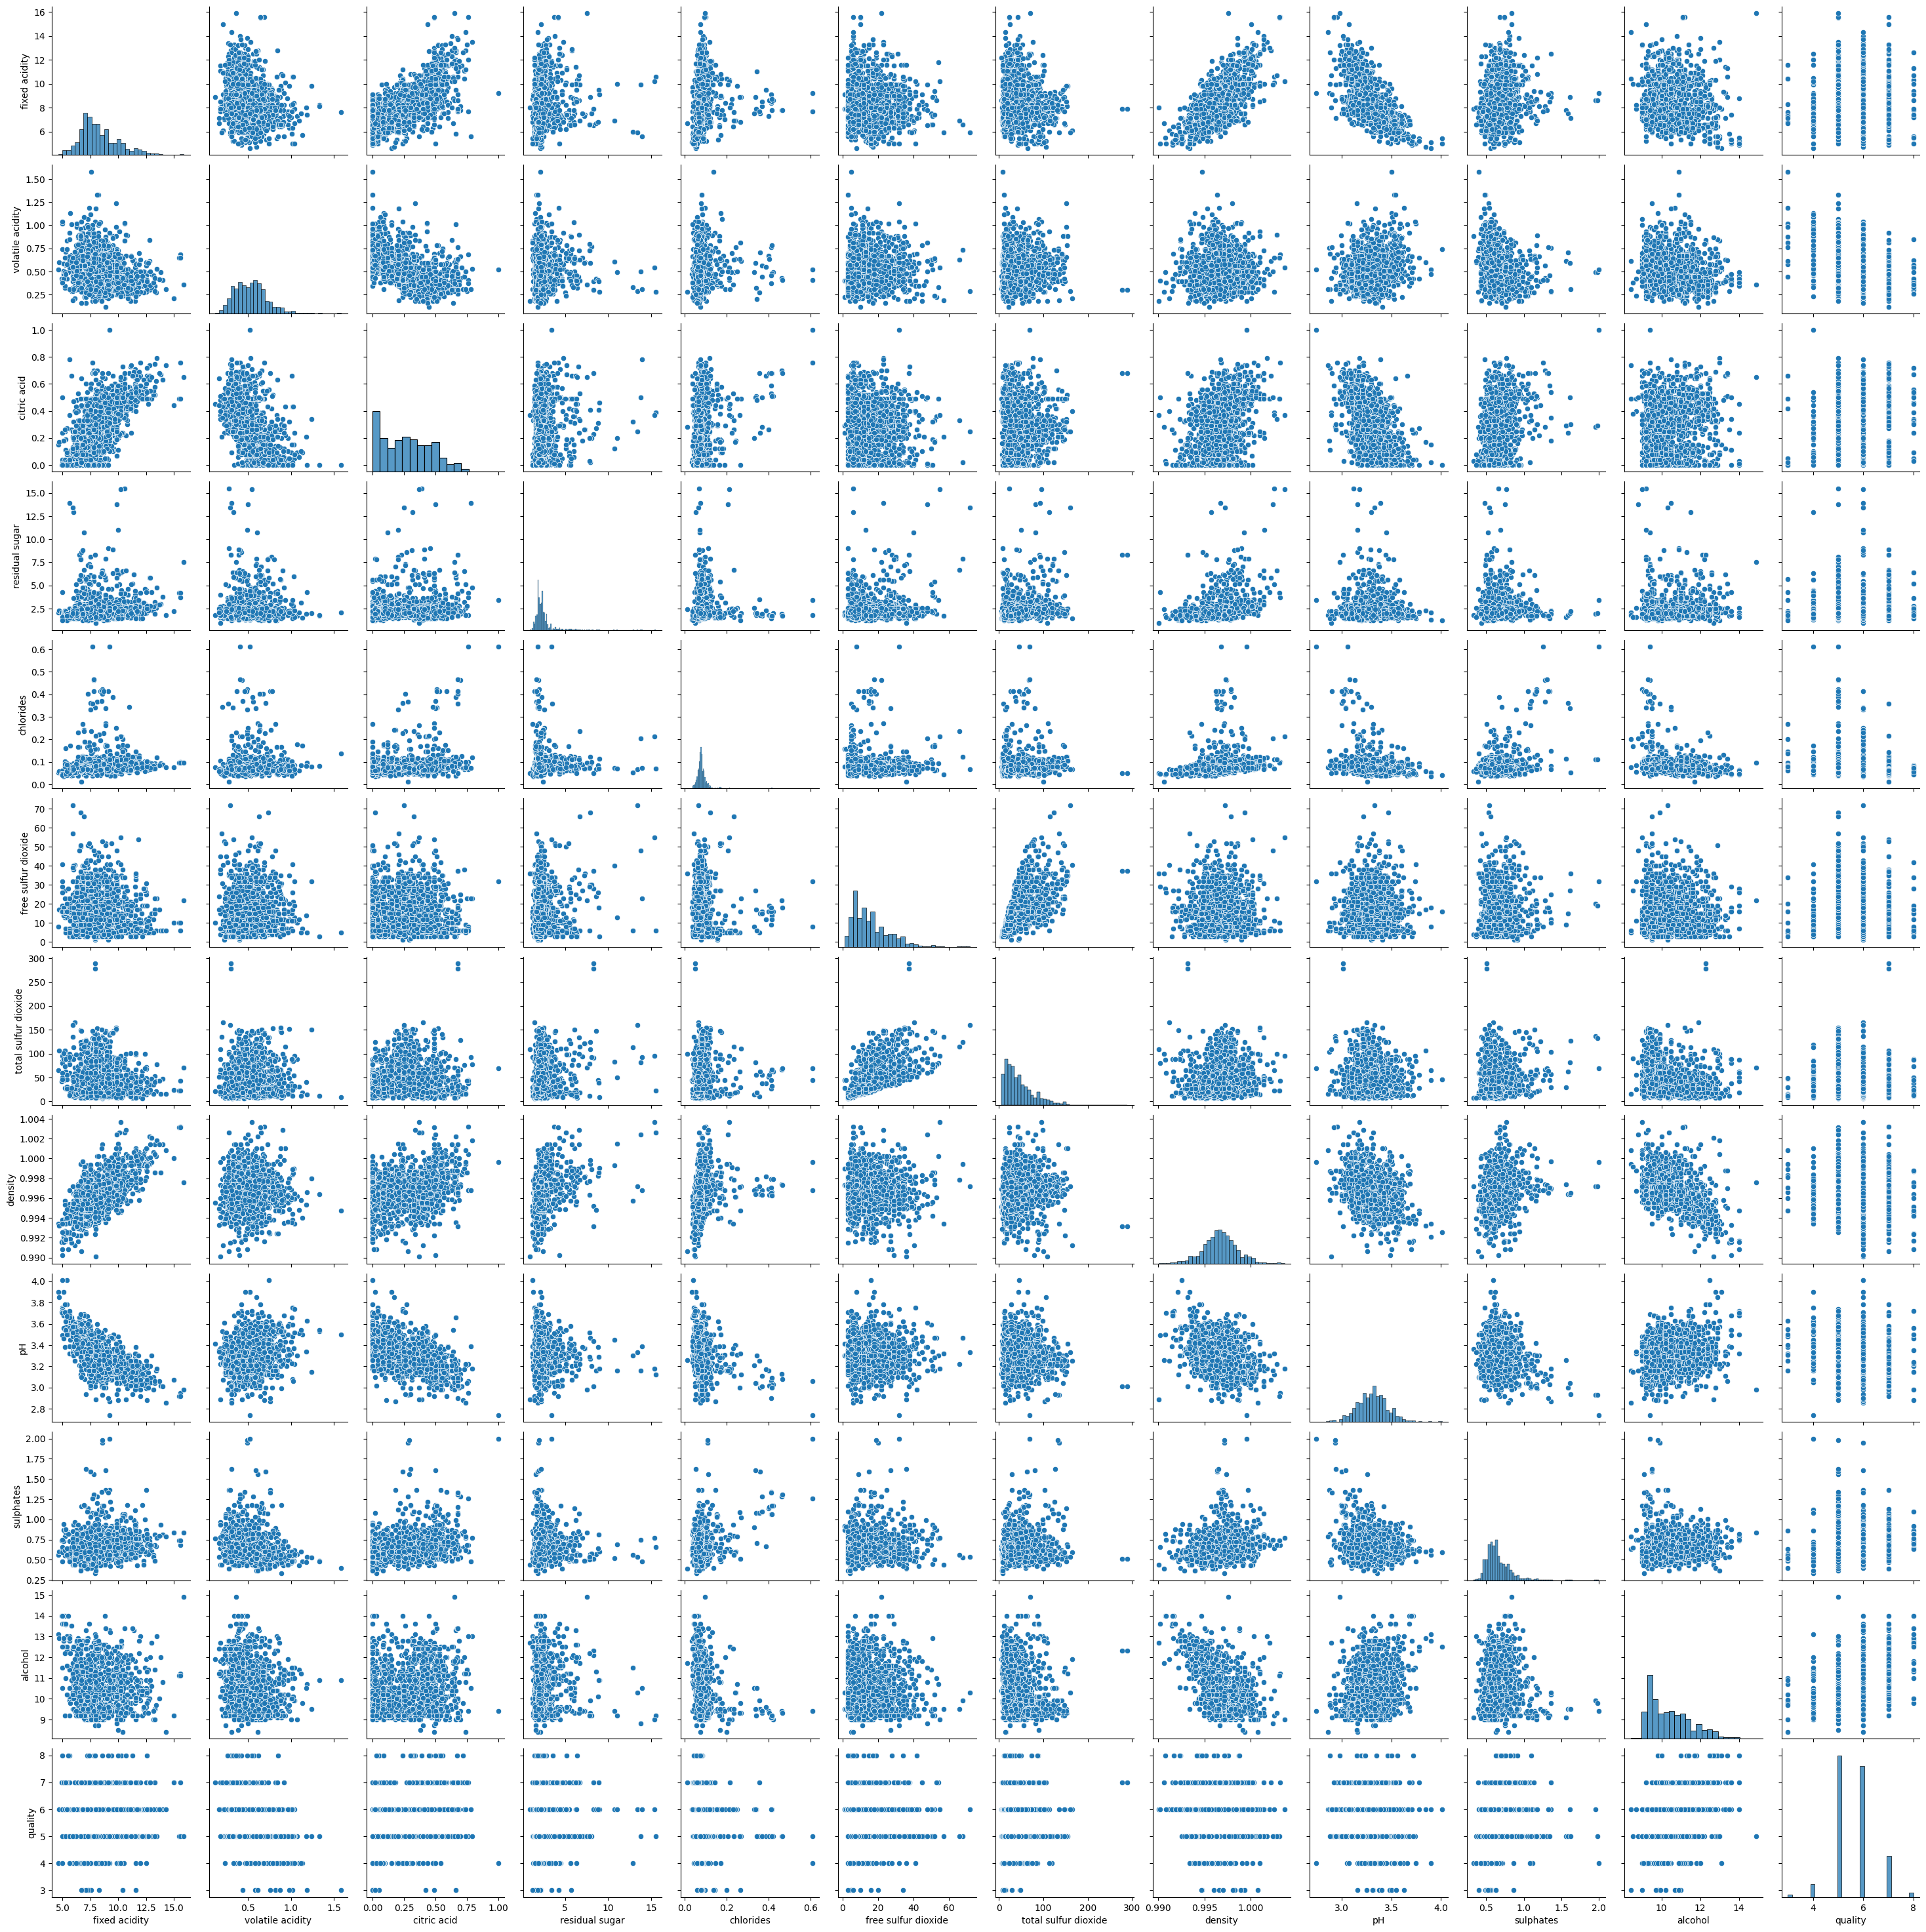

In [11]:
import seaborn as sns
sns.pairplot(data)

In [12]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [13]:
descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=data.columns)
for columnname in data.columns: # qual store in colname
    descriptive[columnname]['Mean'] = data[columnname].mean()
    descriptive[columnname]['Median'] = data[columnname].median()
    descriptive[columnname]['Mode'] = data[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = data.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = data.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = data.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(data[columnname],99)
    descriptive[columnname]['Q4:100%'] = data.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = data[columnname].min()
    descriptive[columnname]['Max'] = data[columnname].max()
descriptive

C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\1656654957.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnname]['Mean'] = data[columnname].mean()
C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\1656654957.py:5: Fut

fixed acidity volatile acidity citric acid residual sugar  \
Mean                 8.310596         0.529478    0.272333         2.5234   
Median                    7.9             0.52        0.26            2.2   
Mode                      7.2              0.5         0.0            2.0   
Q1:25%                    7.1             0.39        0.09            1.9   
Q2:50%                    7.9             0.52        0.26            2.2   
Q3:75%                    9.2             0.64        0.43            2.6   
99%                    13.242           1.0292      0.7042            8.3   
Q4:100%                  15.9             1.58         1.0           15.5   
IQR                       2.1             0.25        0.34            0.7   
1.5 rule                 3.15            0.375        0.51           1.05   
Lesser Outlier           3.95            0.015       -0.42           0.85   
Greater Outlier         12.35            1.015        0.94           3.65   
Min                       4.6             0.12         0.0            0.9   
Max                      15.9             1.58         1.0           15.5   

                chlorides free sulfur dioxide total sulfur dioxide   density  \
Mean             0.088124           15.893304            46.825975  0.996709   
Median              0.079                14.0                 38.0    0.9967   
Mode                 0.08                 6.0                 28.0    0.9968   
Q1:25%               0.07                 7.0                 22.0    0.9956   
Q2:50%              0.079                14.0                 38.0    0.9967   
Q3:75%              0.091                21.0                 63.0   0.99782   
99%               0.36842                50.0               145.84    1.0014   
Q4:100%             0.611                72.0                289.0   1.00369   
IQR                 0.021                14.0                 41.0   0.00222   
1.5 rule           0.0315                21.0                 61.5   0.00333   
Lesser Outlier     0.0385               -14.0                -39.5   0.99227   
Greater Outlier    0.1225                42.0                124.5   1.00115   
Min                 0.012                 1.0                  6.0   0.99007   
Max                 0.611                72.0                289.0   1.00369   

                       pH sulphates    alcohol   quality  
Mean             3.309787  0.658705  10.432315  5.623252  
Median               3.31      0.62       10.2       6.0  
Mode                  3.3      0.54        9.5         5  
Q1:25%               3.21      0.55        9.5       5.0  
Q2:50%               3.31      0.62       10.2       6.0  
Q3:75%                3.4      0.73       11.1       6.0  
99%                3.7042      1.28       13.4       8.0  
Q4:100%              4.01       2.0       14.9       8.0  
IQR                  0.19      0.18        1.6       1.0  
1.5 rule            0.285      0.27        2.4       1.5  
Lesser Outlier      2.925      0.28        7.1       3.5  
Greater Outlier     3.685       1.0       13.5       7.5  
Min                  2.74      0.33        8.4         3  
Max                  4.01       2.0       14.9         8

In [14]:
col = data.columns

In [15]:
lesser =[]
greater =[]

for columnname in col:
  # Lesser outlier --> Min value should not be less than lesser
    if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
    if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname)   

In [16]:
print("Lesser Outliers: ",lesser)
print("Greater Outliers: ",greater)

Lesser Outliers:  ['chlorides', 'density', 'pH', 'quality']
Greater Outliers:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [17]:
for columnname in greater:
    data[columnname][data[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]
    
for columnname in lesser:
    data[columnname][data[columnname]<descriptive[columnname]["Lesser Outlier"]]=descriptive[columnname]["Lesser Outlier"]

C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\1044234438.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[columnname][data[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]
C:\User

In [18]:
descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=data.columns)
for columnname in data.columns: # qual store in colname
    descriptive[columnname]['Mean'] = data[columnname].mean()
    descriptive[columnname]['Median'] = data[columnname].median()
    descriptive[columnname]['Mode'] = data[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = data.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = data.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = data.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(data[columnname],99)
    descriptive[columnname]['Q4:100%'] = data.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = data[columnname].min()
    descriptive[columnname]['Max'] = data[columnname].max()
descriptive

C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\1656654957.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnname]['Mean'] = data[columnname].mean()
C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\1656654957.py:5: Fut

fixed acidity volatile acidity citric acid residual sugar  \
Mean                 8.284069          0.52784    0.272288       2.324099   
Median                    7.9             0.52        0.26            2.2   
Mode                      7.2              0.5         0.0            2.0   
Q1:25%                    7.1             0.39        0.09            1.9   
Q2:50%                    7.9             0.52        0.26            2.2   
Q3:75%                    9.2             0.64        0.43            2.6   
99%                     12.35            1.015      0.7042           3.65   
Q4:100%                 12.35            1.015        0.94           3.65   
IQR                       2.1             0.25        0.34            0.7   
1.5 rule                 3.15            0.375        0.51           1.05   
Lesser Outlier           3.95            0.015       -0.42           0.85   
Greater Outlier         12.35            1.015        0.94           3.65   
Min                       4.6             0.12         0.0            0.9   
Max                     12.35            1.015        0.94           3.65   

                chlorides free sulfur dioxide total sulfur dioxide   density  \
Mean             0.081323           15.714496            46.092715  0.996707   
Median              0.079                14.0                 38.0    0.9967   
Mode               0.1225                 6.0                124.5    0.9968   
Q1:25%               0.07                 7.0                 22.0    0.9956   
Q2:50%              0.079                14.0                 38.0    0.9967   
Q3:75%              0.091                21.0                 63.0   0.99782   
99%                0.1225                42.0                124.5   1.00115   
Q4:100%            0.1225                42.0                124.5   1.00115   
IQR                 0.021                14.0                 41.0   0.00222   
1.5 rule           0.0315                21.0                 61.5   0.00333   
Lesser Outlier     0.0385               -14.0                -39.5   0.99227   
Greater Outlier    0.1225                42.0                124.5   1.00115   
Min                0.0385                 1.0                  6.0   0.99227   
Max                0.1225                42.0                124.5   1.00115   

                       pH sulphates    alcohol   quality  
Mean             3.308889  0.649963  10.428734  5.620677  
Median               3.31      0.62       10.2       6.0  
Mode                  3.3      0.54        9.5       5.0  
Q1:25%               3.21      0.55        9.5       5.0  
Q2:50%               3.31      0.62       10.2       6.0  
Q3:75%                3.4      0.73       11.1       6.0  
99%                 3.685       1.0       13.4       7.5  
Q4:100%             3.685       1.0       13.5       7.5  
IQR                  0.19      0.18        1.6       1.0  
1.5 rule            0.285      0.27        2.4       1.5  
Lesser Outlier      2.925      0.28        7.1       3.5  
Greater Outlier     3.685       1.0       13.5       7.5  
Min                 2.925      0.33        8.4       3.5  
Max                 3.685       1.0       13.5       7.5

In [19]:
lesser =[]
greater =[]

for columnname in col:
  # Lesser outlier --> Min value should not be less than lesser
    if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
    if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname)   

In [20]:
greater

[]

In [21]:
lesser

[]

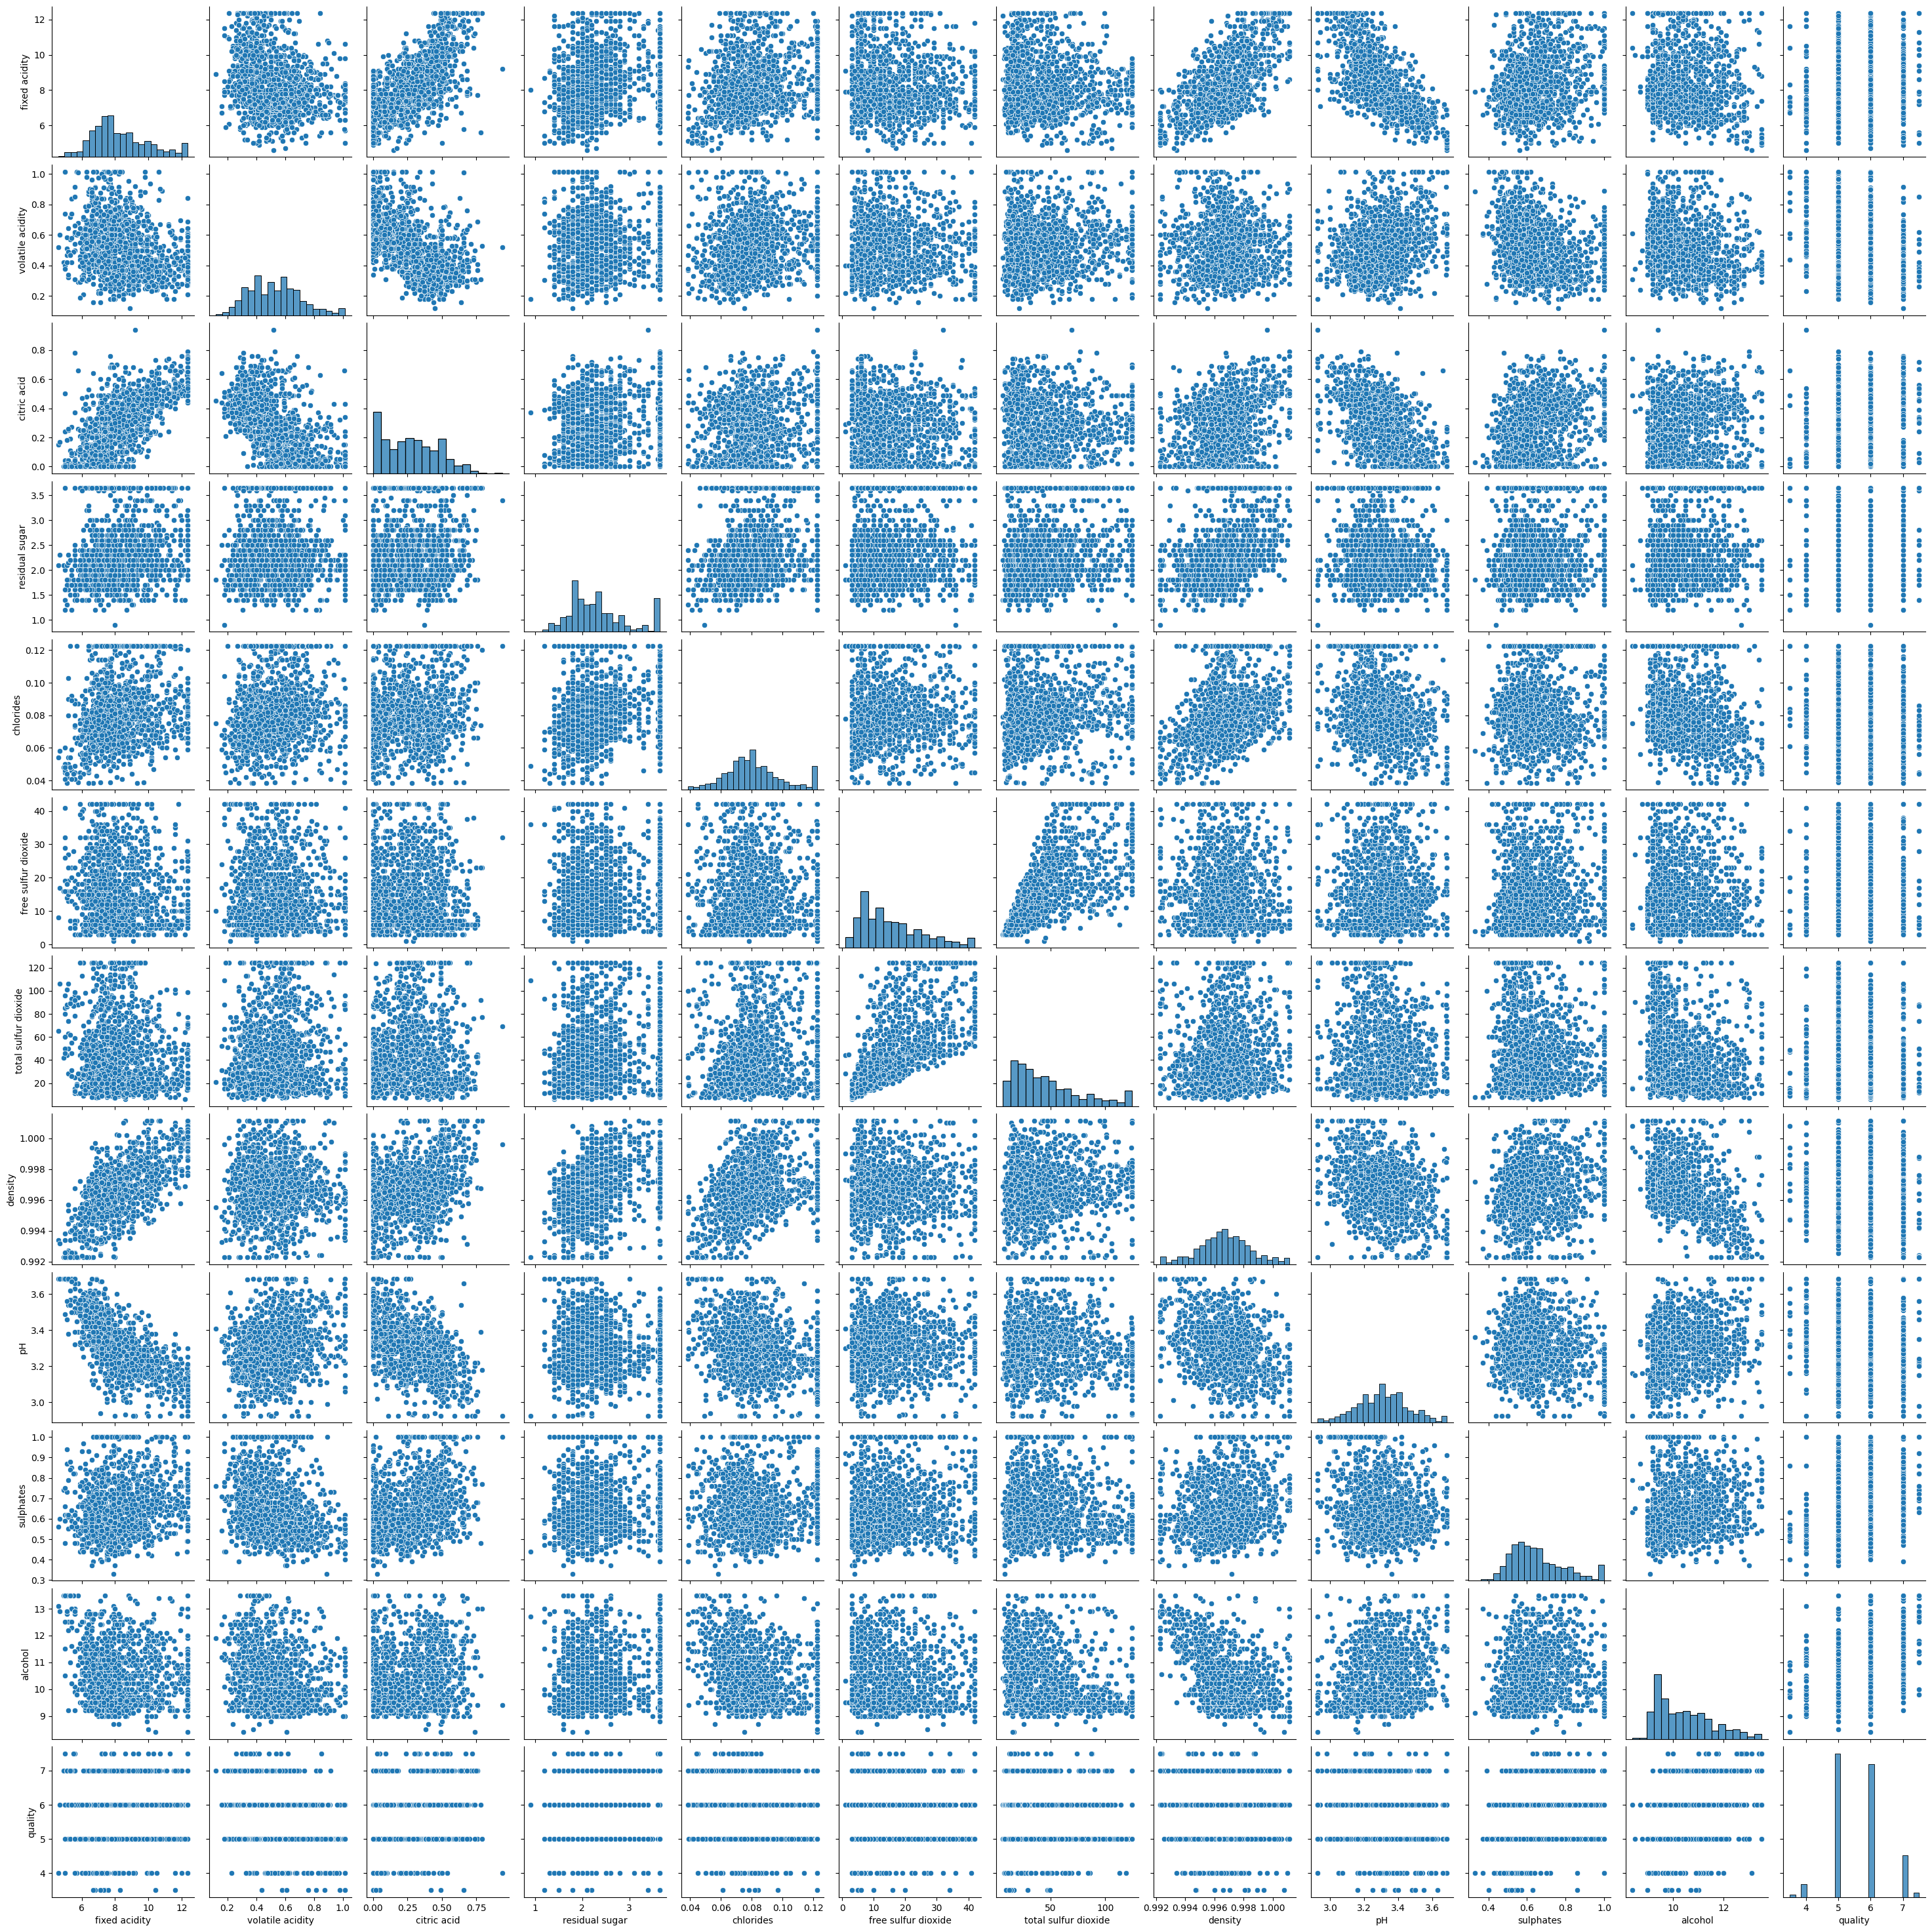

In [22]:
sns.pairplot(data)

In [23]:
data['quality'].value_counts()

quality
5.0    577
6.0    535
7.0    167
4.0     53
7.5     17
3.5     10
Name: count, dtype: int64

In [52]:
data['quality'] = data['quality'].astype(int)
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

In [53]:
corr_mat = data.corr()
corr_mat

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.267421     0.672454   
volatile acidity          -0.267421          1.000000    -0.560157   
citric acid                0.672454         -0.560157     1.000000   
residual sugar             0.214733          0.038673     0.179259   
chlorides                  0.218094          0.141735     0.147204   
free sulfur dioxide       -0.142253         -0.012927    -0.047500   
total sulfur dioxide      -0.109957          0.088597     0.030291   
density                    0.669601          0.021525     0.361570   
pH                        -0.693462          0.248465    -0.555134   
sulphates                  0.224572         -0.311123     0.345605   
alcohol                   -0.071651         -0.205689     0.106349   
quality                    0.123708         -0.397605     0.228150   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.214733   0.218094            -0.142253   
volatile acidity            0.038673   0.141735            -0.012927   
citric acid                 0.179259   0.147204            -0.047500   
residual sugar              1.000000   0.196879             0.080342   
chlorides                   0.196879   1.000000            -0.007580   
free sulfur dioxide         0.080342  -0.007580             1.000000   
total sulfur dioxide        0.152674   0.107389             0.685832   
density                     0.409174   0.404969            -0.024608   
pH                         -0.097583  -0.264409             0.059621   
sulphates                   0.018561   0.127595             0.049309   
alcohol                     0.109226  -0.306170            -0.081324   
quality                     0.019830  -0.189808            -0.050805   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.109957  0.669601 -0.693462   0.224572   
volatile acidity                  0.088597  0.021525  0.248465  -0.311123   
citric acid                       0.030291  0.361570 -0.555134   0.345605   
residual sugar                    0.152674  0.409174 -0.097583   0.018561   
chlorides                         0.107389  0.404969 -0.264409   0.127595   
free sulfur dioxide               0.685832 -0.024608  0.059621   0.049309   
total sulfur dioxide              1.000000  0.103915 -0.066471  -0.005515   
density                           0.103915  1.000000 -0.347814   0.157616   
pH                               -0.066471 -0.347814  1.000000  -0.154669   
sulphates                        -0.005515  0.157616 -0.154669   1.000000   
alcohol                          -0.244589 -0.508409  0.202165   0.157635   
quality                          -0.198076 -0.178900 -0.057987   0.329138   

                       alcohol   quality  
fixed acidity        -0.071651  0.123708  
volatile acidity     -0.205689 -0.397605  
citric acid           0.106349  0.228150  
residual sugar        0.109226  0.019830  
chlorides            -0.306170 -0.189808  
free sulfur dioxide  -0.081324 -0.050805  
total sulfur dioxide -0.244589 -0.198076  
density              -0.508409 -0.178900  
pH                    0.202165 -0.057987  
sulphates             0.157635  0.329138  
alcohol               1.000000  0.475816  
quality               0.475816  1.000000

<Axes: >

<Figure size 640x480 with 0 Axes>

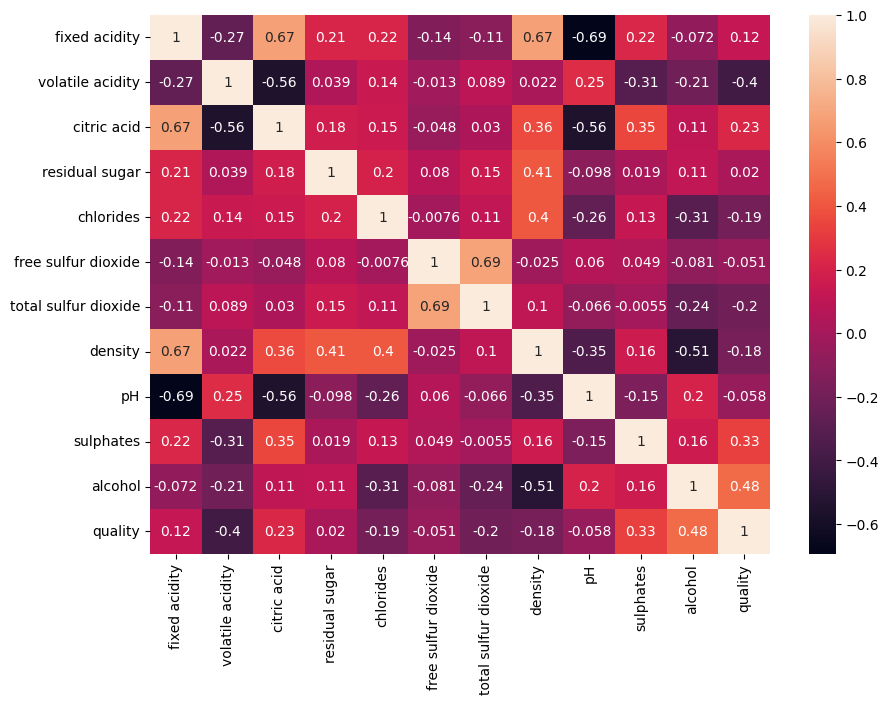

In [54]:
plt.figure()
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat,annot=True)

In [55]:
import time
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [56]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [57]:
indep_X = data.drop("quality",axis=1)



In [58]:
dep_Y = data["quality"]

In [59]:
dep_Y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [60]:
dep_Y.info()

<class 'pandas.core.series.Series'>
Index: 1359 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1359 non-null   int64
dtypes: int64(1)
memory usage: 21.2 KB


In [61]:
# creating a func for select k best
def selectKbest(indep_X, dep_Y,n):
    # Refer - https://scikit-learn.org/stable/modules/feature_selection.htmlhttps://scikit-learn.org/stable/modules/feature_selection.html
    from sklearn.feature_selection import SelectKBest,chi2
    test = SelectKBest(score_func = chi2, k=n) # parameters are chi2 and k value
    fit1=test.fit(indep_X,dep_Y)# fitting input and output to the model
    selectkbest= fit1.transform(indep_X)  # # Transform indep_X to select only for k value features
    return selectkbest

In [62]:

# creating the function for std scalar and input output split
def split_scalar(indep_X,dep_Y):
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(indep_X,dep_Y,test_size = 0.25, random_state = 0)
    sc = StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    return X_train,X_test,Y_train,Y_test

In [63]:

# creating a function for r2 and testing
def r2_prediction(regressor, X_test, Y_test):
    test_pred = regressor.predict(X_test)
    from sklearn.metrics import r2_score
    r2 = r2_score(Y_test, test_pred)
    return r2

In [64]:
# function for Logistic Regression
def logistic_reg(X_train,Y_train,X_test):
    regressor = LogisticRegression(solver='lbfgs')
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

# func for svm
def svm_reg(X_train,Y_train,X_test):
    from sklearn.svm import SVR
    regressor = SVR(kernel ='linear')
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

# func for decision tree
def decisiontree_reg(X_train,Y_train,X_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state= 0)
    regressor.fit(X_train,Y_train)
    r2 =r2_prediction(regressor,X_test,Y_test)
    return r2

# func for randomforest
def randomforest_reg(X_train,Y_train,X_test):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor, X_test,Y_test)
    return r2

# function for linear reg
def linear_reg(X_train,Y_train,X_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

# func for Elasticnet_model
def Elasticnet_reg(X_train,Y_train,X_test):
    regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=None)
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2



In [69]:

# creating func fot df to store the value
def selectK_reg(r2score_lin,r2score_svm,r2score_dt,r2score_rf,r2score_log,r2score_elastic):
    df = pd.DataFrame(index =['ChiSquare'],columns=['Linear','SVM','DecisionTree','RandomForest','Logistic','ElasticNet'])
    df
    for number,idex in enumerate(df.index):
        df['Linear'][idex] = r2score_lin[number]
        df['SVM'][idex] = r2score_svm[number]
        df['DecisionTree'][idex]= r2score_dt[number]
        df['RandomForest'][idex]= r2score_rf[number]
        df['Logistic'][idex] = r2score_log[number]
        df['ElasticNet'][idex] = r2score_elastic[number]
    return df

In [76]:

kbest=selectKbest(indep_X,dep_Y,'all')
r2score_lin=[]
r2score_svm=[]
r2score_dt=[]
r2score_rf=[]
r2score_log =[]
r2score_elastic=[]

In [77]:
X_train,X_test,Y_train,Y_test=split_scalar(kbest,dep_Y)
for i in kbest:
    r2_lin=linear_reg(X_train,Y_train,X_test)
    r2score_lin.append(r2_lin)
    
    r2_svm=svm_reg(X_train,Y_train,X_test)
    r2score_svm.append(r2_svm)
    
    r2_dT=decisiontree_reg(X_train,Y_train,X_test)
    r2score_dt.append(r2_dT)
    
    r2_rf=randomforest_reg(X_train,Y_train,X_test)
    r2score_rf.append(r2_rf)
    
    r2_log=logistic_reg(X_train,Y_train,X_test)
    r2score_log.append(r2_log)
    
    r2_enr=Elasticnet_reg(X_train,Y_train,X_test)
    r2score_elastic.append(r2_enr)

In [73]:
result = selectK_reg(r2score_lin,r2score_svm,r2score_dt,r2score_rf,r2score_log,r2score_elastic)
result# 5

C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\3161633364.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Linear'][idex] = r2score_lin[number]
C:\Users\kathi\AppData\Local\Temp\ipykernel_16176\3161633364.py:7: FutureWarning: Chain

Linear       SVM DecisionTree RandomForest  Logistic ElasticNet
ChiSquare  0.255138  0.235574    -0.280225     0.180873  0.124744  -0.003473

In [78]:
# to split and preprocess
def split_scalar(indep_X,dep_Y):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    X_train,X_test,Y_train,Y_test = train_test_split(indep_X,dep_Y,test_size =0.30,random_state =0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train,X_test,Y_train,Y_test

In [ ]:
# r2 for regression
def r2_prediction(regressor,X_test,Y_test):
    from sklearn.metrics import r2_score
    test_pred = regressor.predict(X_test)
    r2 = r2_score(Y_test,test_pred)
    return r2

In [ ]:
# function for Logistic Regression
def logistic_reg(X_train,Y_train,X_test):
    regressor = LogisticRegression(solver='lbfgs')
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

# func for svm
def svm_reg(X_train,Y_train,X_test):
    from sklearn.svm import SVR
    regressor = SVR(kernel ='linear')
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

# func for decision tree
def decisiontree_reg(X_train,Y_train,X_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state= 0)
    regressor.fit(X_train,Y_train)
    r2 =r2_prediction(regressor,X_test,Y_test)
    return r2

# func for randomforest
def randomforest_reg(X_train,Y_train,X_test):
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor, X_test,Y_test)
    return r2

# function for linear reg
def linear_reg(X_train,Y_train,X_test):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

# func for Elasticnet_model
def Elasticnet_reg(X_train,Y_train,X_test):
    regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=None)
    regressor.fit(X_train,Y_train)
    r2 = r2_prediction(regressor,X_test,Y_test)
    return r2

